<a href="https://colab.research.google.com/github/Machocho254/Hass-Consulting-House-Data/blob/master/Moringa_DS_Core_WEEK7_IP_January_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### a) **DEFINING THE QUESTION**




I work as a Data Scientist, for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, I am to create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 


### b) **Defining the Metric for Success**

This project will be successful when:

          1)We Identify the most crucial independent variables that affect house prices.

          2)The Regression model achieves atleast 80% accuracy

          3)Have the lowest RMSE score possible

### c) **Understanding the Context**

HassConsult offers investment-grade developments all over the City. The developments we offer have been conceptualized by our development team to be high quality assets using a data-driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth.

### d) **Recording the Experimental Design**

The project was carried out using the following design:

Performing EDA

Feature engineering

Quantile Regression

Ridge Regression

Lasso Regression

Elastic Net Regression

Evaluation of the models

Challenging the solutions


### **IMPORTING ALL THE NECESSARY LIBRARIES**

In [0]:
# Importing libraries

# for data analysis and manipulation
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

# for regression analysis
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix


import requests
from io import StringIO
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


### **LOADING AND PREVIEW OF THE DATASET**

In [168]:
# loading the dataset and previewing the first observations

house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [169]:
# previewing the last observations of the data
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.000,3,2.500,1530,1131,3.000,0,0,3,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,400000.000,4,2.500,2310,5813,2.000,0,0,3,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,402101.000,2,0.750,1020,1350,2.000,0,0,3,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,400000.000,3,2.500,1600,2388,2.000,0,0,3,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287
21612,1523300157,325000.000,2,0.750,1020,1076,2.000,0,0,3,7,1020,0,2008,0,98144,47.594,-122.299,1020,1357


In [170]:
# information about the dataset

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


In [171]:
# getting description about the data

house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540182.159,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367362.232,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [172]:
# to get the number of rows and columns

house.shape

(21613, 20)

THe data has 20 variables and 21613 observations

### **DATA CLEANING**

In [173]:
# checking for missing values

house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The data has no missing values. 

In [174]:
# checking for duplicates

house.duplicated().any()

True

In [0]:
# removing the duplicates

house.drop_duplicates(keep='first', inplace = True)

In [176]:
# checking whether the duplicates have been dropped

house.duplicated().any()

# duplicates have been dropped.

False

#### **Outlier Management**

In [177]:
# GETTing the column names 

house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

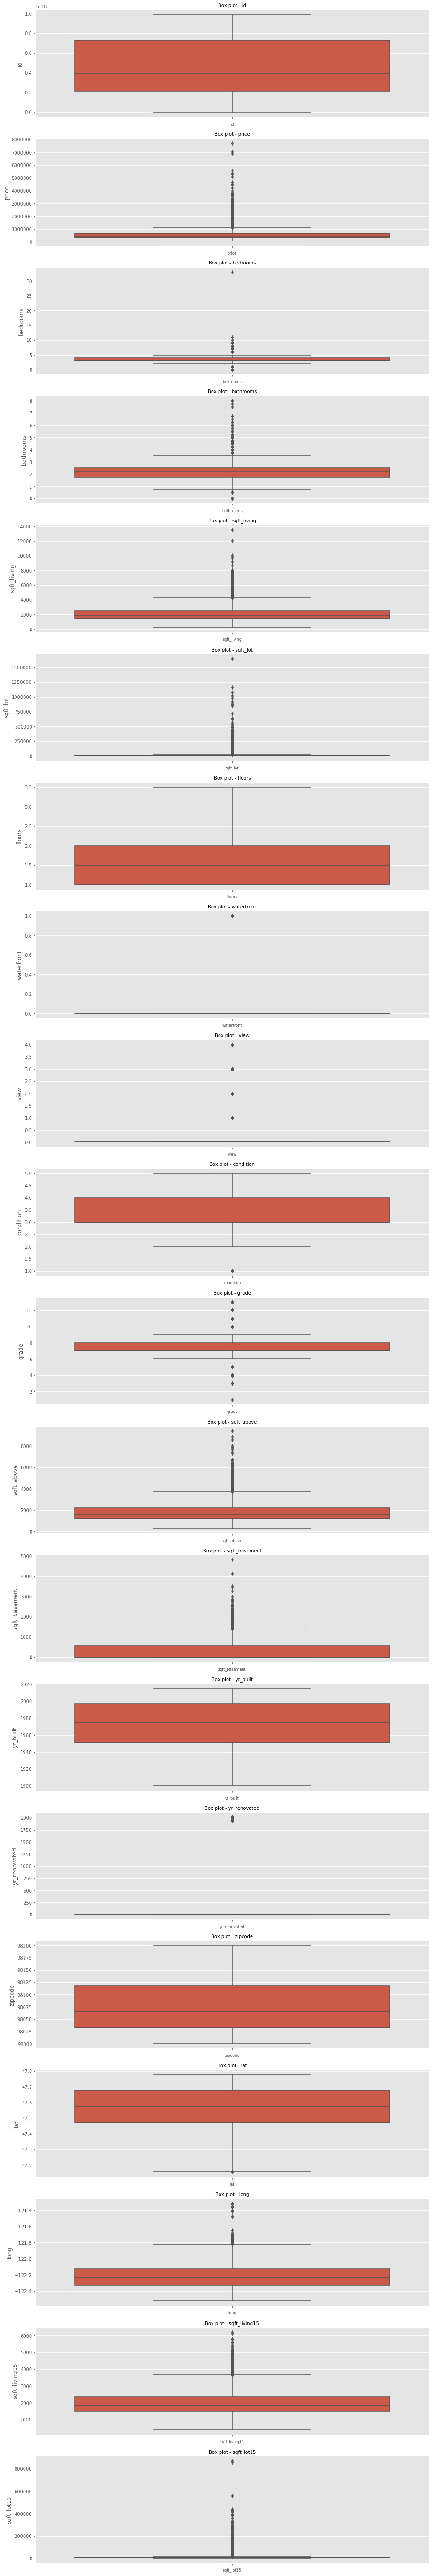

In [178]:
# getting the outliers using boxplots
# 
def plot_boxplots(target_dataframe,col_names):
    fig, ax = plt.subplots(len(col_names), figsize=(15,100))
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)
    plt.show()

#Execute the function
# 
col_names = house.columns
target_dataframe = house
plot_boxplots(target_dataframe,col_names)

In [0]:
# dropping the outliers

outliers = house[(house['bedrooms'] > 30) | (house['sqft_living'] > 11000) | (house['sqft_lot'] > 1250000) | (house['sqft_basement'] > 4000) | (house['sqft_lot15'] > 300000)].index
df = house.drop(outliers)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21584 entries, 0 to 21612
Data columns (total 20 columns):
id               21584 non-null int64
price            21584 non-null float64
bedrooms         21584 non-null int64
bathrooms        21584 non-null float64
sqft_living      21584 non-null int64
sqft_lot         21584 non-null int64
floors           21584 non-null float64
waterfront       21584 non-null int64
view             21584 non-null int64
condition        21584 non-null int64
grade            21584 non-null int64
sqft_above       21584 non-null int64
sqft_basement    21584 non-null int64
yr_built         21584 non-null int64
yr_renovated     21584 non-null int64
zipcode          21584 non-null int64
lat              21584 non-null float64
long             21584 non-null float64
sqft_living15    21584 non-null int64
sqft_lot15       21584 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.5 MB


### **Checking for the unique values**

More steps into data reading and understading by lookin at the unique values and getting more insight about the data. 

In [181]:
# finding unque values for bedrooms
# 
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

In [182]:
# finidng the unique values for bathroom
# 
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 7.5 , 7.75, 6.25, 6.5 ])

In [0]:
# change the categorical features to the correct data types
# name the features that are categorical
# 
cat_cols = ['waterfront', 'grade', 'view', 'condition']

# use a for loop to change the datatypes to categorical
# 
for col in cat_cols:
  df[col] = df[col].astype('category')

## **EXPLORATORY DATA ANALYSIS**

### **UNIVARIATE ANALYSIS**

To get the measures of central tendencies and measures of dispersion (spread)

To get:


1.   Mean
2.   Mode
3.   Median
4.   Variance
5.   Standard deviation

Using the describe() function to find the mean, median, standard deviation and variance of the data. 



#### **Arithmetic mean of each column**

In [184]:
# finding the mean for the columns

from statistics import mean, median, mode, stdev

print ("The mean of the price is ", df['price'].mean())

print ("The mean of the bedrooms is ", df['bedrooms'].mean())

print ("The mean of the bathrooms is ", df['bathrooms'].mean())

print ("The mean of the Square feet of living room is ", df['sqft_living'].mean())

print ("The mean of the Squarefeet of parking lot is ", df['sqft_lot'].mean())

print ("The mean of the Squarefeet of above floor is ", df['sqft_above'].mean())

print ("The mean of the size of baseent in squarefeet is ", df['sqft_basement'].mean())
# df[''].mean()

The mean of the price is  539443.7336916234
The mean of the bedrooms is  3.3692550037064493
The mean of the bathrooms is  2.113718495181616
The mean of the Square feet of living room is  2077.787203484062
The mean of the Squarefeet of parking lot is  14695.999722016308
The mean of the Squarefeet of above floor is  1786.8056893995551
The mean of the size of baseent in squarefeet is  290.98151408450707


#### **Median of each column**

In [185]:
# to find the median of the dataframe

print ("The median of the price is ", df['price'].median())

print ("The median of the bedrooms is ", df['bedrooms'].median())

print ("The median of the bathrooms is ", df['bathrooms'].median())

print ("The median of the Square feet of living room is ", df['sqft_living'].median())

print ("The median of the Squarefeet of parking lot is ", df['sqft_lot'].median())

# print ("The median of the Grade is ", df['grade'].median())

print ("The median of the Squarefeet of above floor is ", df['sqft_above'].median())

print ("The median of the size of baseent in squarefeet is ", df['sqft_basement'].median())

The median of the price is  450000.0
The median of the bedrooms is  3.0
The median of the bathrooms is  2.25
The median of the Square feet of living room is  1910.0
The median of the Squarefeet of parking lot is  7613.5
The median of the Squarefeet of above floor is  1560.0
The median of the size of baseent in squarefeet is  0.0


In [186]:
# mode of the dataframe

df.mode()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,795000620.000,350000.000,3.000,2.500,1300.000,5000.000,1.000,0,0,3,7,1300.000,0.000,2014.000,0.000,98103.000,47.532,-122.290,1540.000,5000.000
1,nan,450000.000,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,47.549,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,47.662,nan,nan,nan
3,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,47.685,nan,nan,nan


#### **Measures of dispersion**

In [187]:
# use a for loop to get the variance 

pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.var()

id              8272976227803638784.000
price                  131637016909.527
bedrooms                          0.823
bathrooms                         0.588
sqft_living                  828681.477
sqft_lot                 1405672081.708
floors                            0.292
waterfront                        0.007
view                              0.584
condition                         0.424
grade                             1.377
sqft_above                   679014.883
sqft_basement                193682.298
yr_built                        862.608
yr_renovated                 160880.790
zipcode                        2863.316
lat                               0.019
long                              0.020
sqft_living15                469306.457
sqft_lot15                550289910.976
dtype: float64

In [188]:
# standard deviatiion

df.std()

id              2876278190.267
price               362818.160
bedrooms                 0.907
bathrooms                0.767
sqft_living            910.319
sqft_lot             37492.294
floors                   0.540
waterfront               0.086
view                     0.765
condition                0.651
grade                    1.173
sqft_above             824.024
sqft_basement          440.094
yr_built                29.370
yr_renovated           401.099
zipcode                 53.510
lat                      0.138
long                     0.141
sqft_living15          685.059
sqft_lot15           23458.259
dtype: float64

####  **Frequency tables and Histograms**

In [0]:
# 

#### **BIVARIATE ANALYSIS**

Since the variables are all numerical in nature, the analysis will be scatter plots and linear correlation



The response variable is the price of the house. We are trying to study the relationship between the predictor variables and the response variable. 

The predictor variables to be considered in this study will be:


*   THe number of bedrooms
*   The number of bathrooms
*   THe size of the living room
*   The size of the parking lot
*   THe number of floors in the house



**Number of bedrooms vs Price of the house**

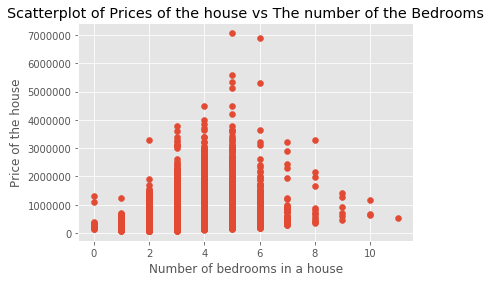

In [190]:
# scatterplot of Price of the house vs THe number of bedrooms in the house

plt.scatter(df["bedrooms"] , df["price"])
plt.title('Scatterplot of Prices of the house vs The number of the Bedrooms')
plt.xlabel('Number of bedrooms in a house')
plt.ylabel('Price of the house')
plt.show()

In [191]:
# Calculating the pearson coefficient
pearson_coeff = df["price"].corr(df["bedrooms"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["price"].corr(df["bedrooms"]) 
print(coeff)

0.31553939526304486
0.31553939526304486


There is a positive correlation between the number of the bedrooms and the price of the house. The correlation is however low, as it is < 0.5. This translates to when there is an increase in the number of the bedrooms, th price of the house increases.  

**Number of Bathrooms vs Price of the house**

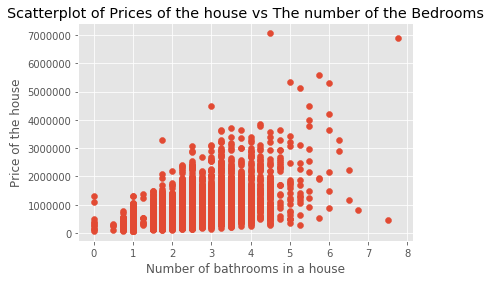

In [192]:
# scatterplot of the number of bathrooms in correlation to price of the house
plt.scatter(df["bathrooms"] , df["price"])
plt.title('Scatterplot of Prices of the house vs The number of the Bedrooms')
plt.xlabel('Number of bathrooms in a house')
plt.ylabel('Price of the house')
plt.show()


In [193]:
# Calculating the pearson coefficient
pearson_coeff = df["price"].corr(df["bathrooms"], method="pearson") 
print(pearson_coeff)


0.5215257677268599


There is a high positive correlation between the numeber of bathrooms in the house and the price of the house. This translates to, for every increase in the number of the bathrooms, the price of the house increases by 0.521525.

#### **MULTIVARIATE ANALYSIS**

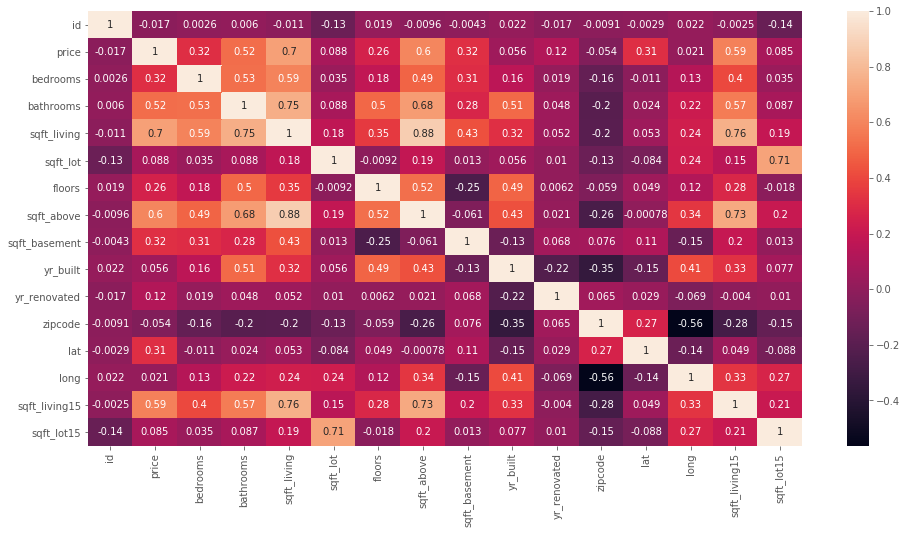

In [194]:
# to get the frequency heatmap for the correlations of the dataframe 
#
plt.figure(figsize=(16, 8))
vg_corr = df.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);



In [0]:
# get dummy variables for the waterfront column
# 
df_2 = pd.get_dummies(df, columns=['waterfront'])


In [196]:
df_2.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'waterfront_0', 'waterfront_1'],
      dtype='object')

In [197]:
df_3 = df_2.drop(['id', 'zipcode', 'lat', 'long'], axis=1)
df_3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_0,waterfront_1
0,221900.000,3,1.000,1180,5650,1.000,0,3,7,1180,0,1955,0,1340,5650,1,0
1,538000.000,3,2.250,2570,7242,2.000,0,3,7,2170,400,1951,1991,1690,7639,1,0
2,180000.000,2,1.000,770,10000,1.000,0,3,6,770,0,1933,0,2720,8062,1,0
3,604000.000,4,3.000,1960,5000,1.000,0,5,7,1050,910,1965,0,1360,5000,1,0
4,510000.000,3,2.000,1680,8080,1.000,0,3,8,1680,0,1987,0,1800,7503,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.000,3,2.500,1530,1131,3.000,0,3,8,1530,0,2009,0,1530,1509,1,0
21609,400000.000,4,2.500,2310,5813,2.000,0,3,8,2310,0,2014,0,1830,7200,1,0
21610,402101.000,2,0.750,1020,1350,2.000,0,3,7,1020,0,2009,0,1020,2007,1,0
21611,400000.000,3,2.500,1600,2388,2.000,0,3,8,1600,0,2004,0,1410,1287,1,0


### **Feature Engineering**

In [198]:
# The columns sqft_above and sqft_living have a very high correlation of 0.88 
# thus we join the two to form a new column 
# 
df = df_2

df_2['sqft_abv_living'] = df_2['sqft_above'] + df_2['sqft_living']
df_2

# drop the sqft_living and sqft_above as we will have no use for them
# 
df_3 = df_2.drop(['sqft_above', 'sqft_living', 'id', 'zipcode', 'lat', 'long'], axis=1)
df_3.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_0,waterfront_1,sqft_abv_living
0,221900.000,3,1.000,5650,1.000,0,3,7,0,1955,0,1340,5650,1,0,2360
1,538000.000,3,2.250,7242,2.000,0,3,7,400,1951,1991,1690,7639,1,0,4740
2,180000.000,2,1.000,10000,1.000,0,3,6,0,1933,0,2720,8062,1,0,1540
3,604000.000,4,3.000,5000,1.000,0,5,7,910,1965,0,1360,5000,1,0,3010
4,510000.000,3,2.000,8080,1.000,0,3,8,0,1987,0,1800,7503,1,0,3360


In [0]:
# allocating values for X and Y
# 
X = df_3.drop(columns= ['price'], axis=1)
y = df_3['price']

#### **Principal Components Analysis**

Feature redduction using the PCA

In [200]:
df_3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'waterfront_0', 'waterfront_1',
       'sqft_abv_living'],
      dtype='object')

In [201]:
# feature reduction using PCA
#Finding the best principal Components
# 
from sklearn.decomposition import PCA

np.random.seed(0)

train_features = X

model = PCA(n_components=6).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# creating a list of the feature names
# 
initial_feature_names = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'waterfront_0', 'waterfront_1',
       'sqft_abv_living']


# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df_PCS = pd.DataFrame(dic.items())

# getting the explained variance and explained variance ratio
# 
explained_variances_ratios = model.explained_variance_ratio_

explained_variance = model.explained_variance_

# adding the explained_variances_ratio column to the PC df
# 
df_PCS['explained_variances_ratios'] = explained_variances_ratios
df_PCS

,0,1,explained_variances_ratios
0,PC0,sqft_lot,0.884
1,PC1,sqft_lot15,0.114
2,PC2,sqft_abv_living,0.002
3,PC3,sqft_basement,0.000
4,PC4,sqft_living15,0.000
5,PC5,yr_renovated,0.000


> The dataframe above gives an ordered list of how the principal components explain the variance starting from the highest explained variance to the lowest. PC0 explains the most variance while PC5 explains the least Variance. 
Their explained variances have been attached for more insight of how the different components explain the variance. 

## **REGRESSION**

### **MULTIPLE LINEAR REGRESSION**

In [202]:
df_3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'waterfront_0', 'waterfront_1',
       'sqft_abv_living'],
      dtype='object')

In [203]:
# specifying the values for X and Y 
# this will be a multilinear regression model as there are a number of featured
# 
# X = df_3[['bathrooms', 'bedrooms', 'sqft_lot', 'sqft_basement', 'sqft_above']].values
# y = df_3['price'].values

# Train using 80% of the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
# 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# to predict y using the model
# 
y_pred = regressor.predict(X_test)

# to find the comparison frame for the model
# 
# comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
# comparison_frame.describe()

print("The regressor coefficient is ", regressor.coef_)
print("The regressor intercept is ", regressor.intercept_)

The regressor coefficient is  [-4.30393156e+04  4.58330348e+04 -2.08121185e-02  2.36476598e+04
  4.22840188e+04  2.01315008e+04  1.18656414e+05  8.61088921e+01
 -3.50599912e+03  5.30738573e+00  2.51207837e+01 -6.00155809e-01
 -2.89013962e+05  2.89013962e+05  8.19160757e+01]
The regressor intercept is  6376046.314191882


In [204]:
from sklearn import ensemble
lr = ensemble.GradientBoostingRegressor()
model = lr.fit(X_train, y_train)
linear_model =  model.score(X_test, y_test)
linear_model



0.7576032660625114

> The model has an accuracy is 75%, hence the multiple linear regression is a good regressor for the data

In [205]:
# import the metric library to use for calculating the RMSE
from sklearn import metrics
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 138598.60049557933
Mean Squared Error: 43334921815.903725
Root Mean Squared Error: 208170.41532336848


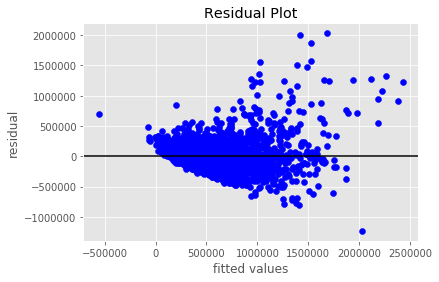

In [206]:
# Plotting the prediction errors

residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

> The residual plot above shows a random, clustered pattern around zero, indicating low heteroskedasticity thus,a good fit for the linear model.

### Checking for Heteroscadasticity using Barlett's Test

> The concept of [heteroscedasticity](https://www.xlstat.com/en/solutions/features/heteroscedasticity-tests) - the opposite being homoscedasticity - is used in statistics, especially in the context of linear regression or for time series analysis, to describe the case where the variance of errors or the model is not the same for all observations, while often one of the basic assumption in modeling is that the variances are homogeneous and that the errors of the model are identically distributed.

> The barlett'stest establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints

In [207]:
# Using critical value to find the heteroskedasticity
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

## comparing the critical value and the test result
if (test_result > critical_value):
 print('the variances are unequal, and the model should be reassessed')
else:
 print('the variances are homogeneous!')

inf
the variances are homogeneous!


### **QUANTILE REGRESSION**

In [208]:
# previewing the dataset
# 
df_3.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_0,waterfront_1,sqft_abv_living
0,221900.000,3,1.000,5650,1.000,0,3,7,0,1955,0,1340,5650,1,0,2360
1,538000.000,3,2.250,7242,2.000,0,3,7,400,1951,1991,1690,7639,1,0,4740
2,180000.000,2,1.000,10000,1.000,0,3,6,0,1933,0,2720,8062,1,0,1540
3,604000.000,4,3.000,5000,1.000,0,5,7,910,1965,0,1360,5000,1,0,3010
4,510000.000,3,2.000,8080,1.000,0,3,8,0,1987,0,1800,7503,1,0,3360


In [209]:
# getting information about the dataset
# 
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21584 entries, 0 to 21612
Data columns (total 16 columns):
price              21584 non-null float64
bedrooms           21584 non-null int64
bathrooms          21584 non-null float64
sqft_lot           21584 non-null int64
floors             21584 non-null float64
view               21584 non-null category
condition          21584 non-null category
grade              21584 non-null category
sqft_basement      21584 non-null int64
yr_built           21584 non-null int64
yr_renovated       21584 non-null int64
sqft_living15      21584 non-null int64
sqft_lot15         21584 non-null int64
waterfront_0       21584 non-null uint8
waterfront_1       21584 non-null uint8
sqft_abv_living    21584 non-null int64
dtypes: category(3), float64(3), int64(8), uint8(2)
memory usage: 2.1 MB


In [210]:
# df_3['floors'] = df_3['floors'].apply(pd.to_numeric) 

# df_3['floors'] = df.astype({'floors': float})

df_3.floors = df.floors.astype(int)
# 
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21584 entries, 0 to 21612
Data columns (total 16 columns):
price              21584 non-null float64
bedrooms           21584 non-null int64
bathrooms          21584 non-null float64
sqft_lot           21584 non-null int64
floors             21584 non-null int64
view               21584 non-null category
condition          21584 non-null category
grade              21584 non-null category
sqft_basement      21584 non-null int64
yr_built           21584 non-null int64
yr_renovated       21584 non-null int64
sqft_living15      21584 non-null int64
sqft_lot15         21584 non-null int64
waterfront_0       21584 non-null uint8
waterfront_1       21584 non-null uint8
sqft_abv_living    21584 non-null int64
dtypes: category(3), float64(2), int64(9), uint8(2)
memory usage: 2.1 MB


In [0]:
#Separating training and testing datasets using numerical data
C = df_3.drop(['condition', 'grade','waterfront_0','waterfront_1','view'], axis=1) 
y = df_3['price']

In [212]:
from sklearn.model_selection import train_test_split
C_train, C_test, y_train, y_test = train_test_split(C,y, test_size=0.2, random_state=24)
# importing python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ C', df_3)
res = mod.fit(q=.8)
  # Then print out the summary of our model
  #
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:                1.000
Model:                       QuantReg   Bandwidth:                   5.219e-07
Method:                 Least Squares   Sparsity:                    1.020e-05
Date:                Thu, 13 Feb 2020   No. Observations:                21584
Time:                        11:45:38   Df Residuals:                    21572
                                        Df Model:                           11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.708e-08   9.67e-10     48.703      0.000    4.52e-08     4.9e-08
C[0]           1.0000   1.73e-13   5.78e+12      0.000       1.000       1.000
C[1]        1.036e-06   4.56e-08     22.738      0.000    9.47e-07    1.13e-06
C[2]       -1.581e-06   7.99e-08    -19.802      0.0

In [213]:
# Making Predictions
# 
pred = res.predict(C)
# To compare the actual output values for X_test with the predicted values
# 
B1 = pd.DataFrame({'Actual': y, 'Predicted': pred})
B1

,Actual,Predicted
0,221900.000,221900.000
1,538000.000,538000.000
2,180000.000,180000.000
3,604000.000,604000.000
4,510000.000,510000.000
...,...,...
21608,360000.000,360000.000
21609,400000.000,400000.000
21610,402101.000,402101.000
21611,400000.000,400000.000


In [214]:
#Using Quantile 0.2,
from sklearn.model_selection import train_test_split
C_train, C_test, y_train, y_test = train_test_split(C,y, test_size=0.2, random_state=24)
# importing python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ C', df_3)
res = mod.fit(q=.2)
  # Then print out the summary of our model
  #
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:                1.000
Model:                       QuantReg   Bandwidth:                   2.743e-07
Method:                 Least Squares   Sparsity:                    4.353e-06
Date:                Thu, 13 Feb 2020   No. Observations:                21584
Time:                        11:45:38   Df Residuals:                    21572
                                        Df Model:                           11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.651e-08   4.04e-10     65.612      0.000    2.57e-08    2.73e-08
C[0]           1.0000   6.09e-14   1.64e+13      0.000       1.000       1.000
C[1]        1.572e-07   2.51e-08      6.260      0.000    1.08e-07    2.06e-07
C[2]       -3.742e-06   3.79e-08    -98.658      0.0

In [215]:
from sklearn.metrics import r2_score
u = r2_score(y, pred)
u

1.0

### **RIDGE REGRESSION**

Regularization is the process of penalizing coefficients of variables either by removing them and or reducing their impact. 
Ridge regression reduces the effect of problematic variables close to zero but never fully removes them. 

>  In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. L2 is the name of the hyperparameter that is used in ridge regression. Determining the value of a hyperparameter requires the use of a grid. 

> In the code below, we first create our ridge model and indicate normalization in order to get better estimates. Next we setup the grid that we will use. The search object has several arguments within it. Alpha is hyperparameter we are trying to set. The log space is the range of values we want to test. 

> Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling and cv is the number of folds to develop for the cross-validation.

In [0]:
# importing the libraries


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [217]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'waterfront_0', 'waterfront_1', 'sqft_abv_living'],
      dtype='object')

In [218]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
search.best_params_
# {'alpha': 0.001}
 

# The best_params_ tells us what to set alpha too which in this case is 0.001. 
# The best_score_ tells us what the best possible mean squared error is.

{'alpha': 100.0}

In [219]:
first_model = abs(search.best_score_)
print(first_model)

134197741593.25432


### **Hyperparameter Tuning**

In [220]:
# We can confirm this by fitting our model with the ridge information and finding the
# mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_train , y_train)
second_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(second_model)

121524457601.39577


In [221]:
# when the value of alpha is 1
# 
ridge = Ridge(normalize=True,alpha=1)
ridge.fit(X_train , y_train)
third_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(third_model)

121455307298.08879


In [222]:
# when the value of alpha is 10
# 
ridge = Ridge(normalize=True,alpha=10)
ridge.fit(X_train , y_train)
fourth_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(fourth_model)

121444746456.28975


In [223]:
# when value of alpha is 100
# 
ridge = Ridge(normalize=True,alpha=100)
ridge.fit(X_train , y_train)
fifth_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(fifth_model)

121443339689.2057


In [231]:
# when value of alpha is 0.001
# 
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train , y_train)
fifth_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(fifth_model)

121529673255.10959


In [229]:
models = ['0.001','0.01', '1', '10', '100']
model_names = [first_model,second_model,third_model,fourth_model,fifth_model]
con = pd.DataFrame({'Alpha_value': models, 'mean_squared_error': model_names})
con

,Alpha_value,mean_squared_error
0,0.001,134197741593.254
1,0.01,121524457601.396
2,1,121455307298.089
3,10,121444746456.290
4,100,121530232418.857


> The lowest RMSE is given by the lowest value of alpha which is .001. 

### **LASSO REGRESSION APPROACH**

> Before building the models, let's first scale data. Lasso put constraints on the size of the coefficients associated to each variable. But, this value depends on the magnitude of each variable and it is therefore necessary to center and reduce, or standardize, the variables.

In [0]:
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

> We can basically build the Lasso model. 
But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. Note, that we are not setting the alpha, it is defined as 1.

In [233]:
# Importing linear models
# 
from sklearn import linear_model

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X_train, y_train) 

# Print scores, Mean Squared Error, and coefficients
# 
print("lasso score:", lasso.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, lasso.predict(X_test))) 
print("lasso coef:", lasso.coef_) 

lasso score: -134418.50161618035
lasso MSE: 1.6323360310886632e+16
lasso coef: [  7290.33069435  -2897.15641199  -3468.07953756  -2897.57394138
  -2491.67515199    674.97373082  10145.90509545   1874.69206276
   6478.21000904   4802.98739133  -4409.02063554   4091.44954735
   -295.18651139      0.         -10058.58676142]


> Lasso regression should reduce all the coefficient to zeros, but as shown the model does not do that. 

> We should perform a hyperparameter tuning to improve the accuracy of our model. 

#### **Hyperparameter Tuning**

> Splitting the data into training and test sets, building Lasso, 
and choosing the regularization parameter with the help of GridSearch. For that, we have to define the set of parameters for GridSearch. In this case, a model with the highest R-squared score will give us the best parameters.


In [235]:
#splitting data into training and test sets, and choose a set of parameters

X_train, X_test, y_train, y_test = train_test_split(C, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 1.0
lasso MSE: 7.557105349157561e-14
lasso best estimator coef: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
linear coef: [ 1.00000000e+00  1.96424792e-12 -4.00900785e-13  1.06706565e-17
 -2.04895893e-12 -6.97682770e-16  3.01910230e-14  1.20503863e-15
  5.34673420e-17 -1.22545214e-17 -2.20818279e-15]


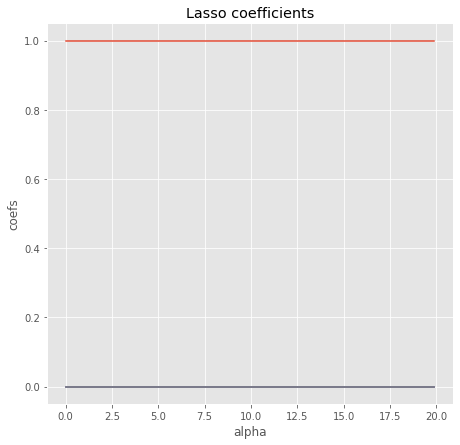

In [236]:
# visualizing 
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 

import numpy as np

alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


> Lasso regression did not give me a good model. THe model accuracy is so bad. The Lasso score is 1.0, which means that the there is an overfitting of the data. 

> WE shall try a different approach and see which models will be the best for predicting the prices of houses. 

### **ELASTIC NET REGRESSION**


> Elastic net, just like ridge and lasso regression, requires normalize data. This argument  is set inside the ElasticNet function. 

In [0]:
#importing the necessary libraries to use
from sklearn.linear_model import ElasticNet

In [0]:
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [241]:
# TO GET the best params
search.fit(X_train,y_train)
search.best_params_
abs(search.best_score_)

214571440.79863852

In [0]:

# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [243]:
#  getting score of the model 
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X_train,y_train)
elastic_model=elastic.score(X_test,y_test)
print(elastic_model)

0.5208286391698254


> Elastic net has a model accuracy of 52%. 

In [0]:
# # Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X_test.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that occupation was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

In [0]:
# Building Elastic net coefficient plots

plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot( elastic.coef_,X_test.columns)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

In [0]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X_test.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# Some coefficients have been reduced to zero and only 6 have coefficients. 
# Notice that occupation was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

### **FOLLOW UP QUESTIONS**

### Did we have the correct data?

NO we did not.



### b). Do we need other data to answer our question?
YES! More conclusive features should be included.

### **Conclusion**

Multiple Linear regression and Lasso regression have the best accuracy hence should be used for prediction. 